## Exemplo de Features e Labels

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Tratamento de dados

- Eliminar dados nulos
- Eliminar dados duplicados
- Transformar dados categóricos em numéricos

In [2]:
SEED = 20
np.random.seed(SEED)

df_data = pd.read_csv('../../0_datasets/classification/marketing_investimento.csv')
df_data.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


# Análise Exploratória de Features categóricas

### 1- Relação de estado civil com aderência ao investimento

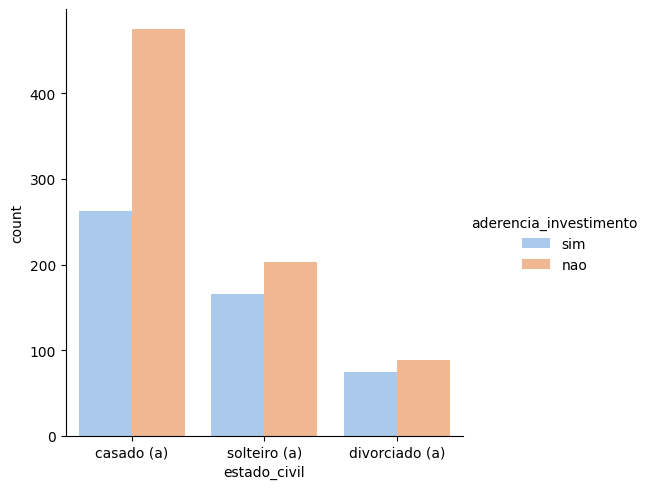

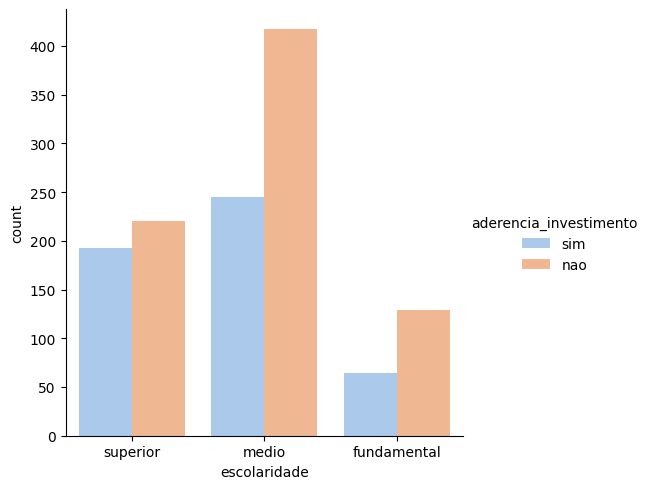

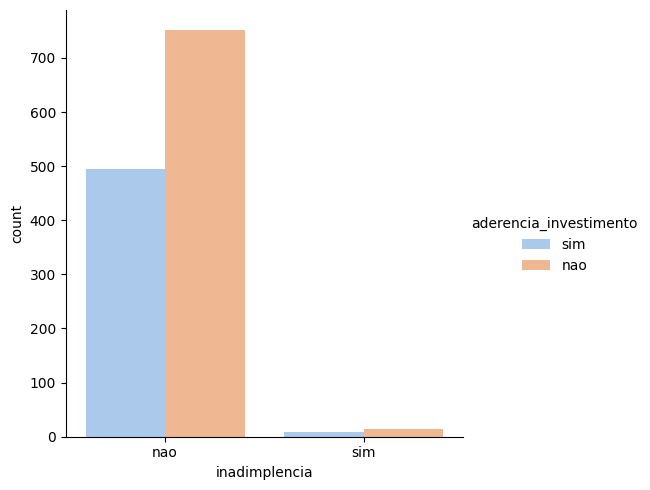

In [3]:
sns.catplot(data=df_data, x="estado_civil", kind='count', palette='pastel', hue='aderencia_investimento')
sns.catplot(data=df_data, x="escolaridade", kind='count', palette='pastel', hue='aderencia_investimento')
sns.catplot(data=df_data, x="inadimplencia", kind='count', palette='pastel', hue='aderencia_investimento')

### 2- Relação de escolaridade com aderência ao investimento

[]

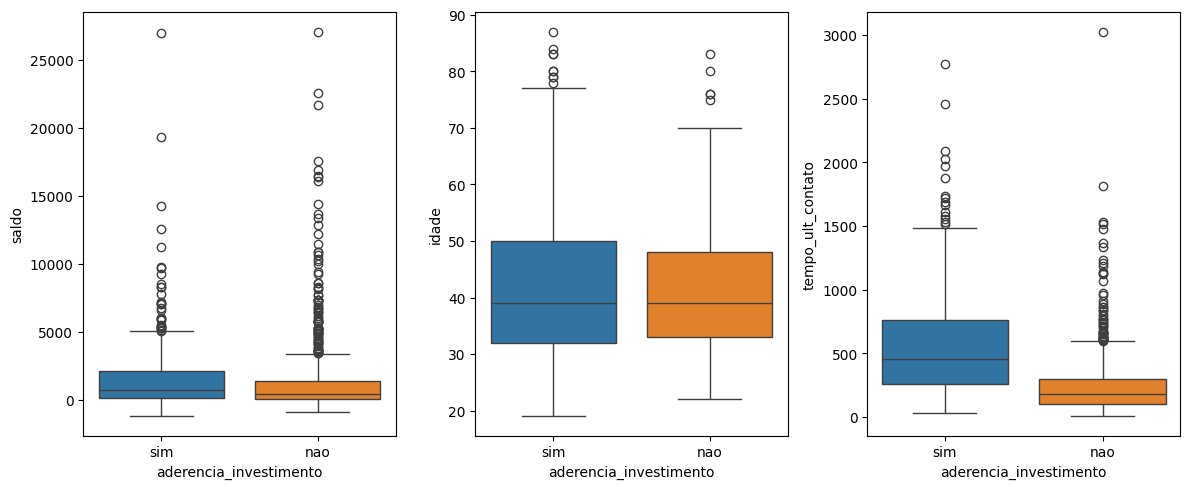

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=df_data, x="aderencia_investimento", y="saldo", hue="aderencia_investimento", ax=axes[0], legend=False)
sns.boxplot(data=df_data, x="aderencia_investimento", y="idade", hue="aderencia_investimento", ax=axes[1], legend=False)
sns.boxplot(data=df_data, x="aderencia_investimento", y="tempo_ult_contato", hue="aderencia_investimento", ax=axes[2], legend=False)

plt.tight_layout()
plt.plot()


In [5]:
df_X = df_data.drop(['aderencia_investimento'], axis=1)
df_y = df_data['aderencia_investimento']
df_X

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [6]:


colunas = df_X.columns

one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), 
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']), 
    remainder='passthrough',
    sparse_threshold=0)
array_X = one_hot.fit_transform(df_X)

label_encoder = LabelEncoder()
array_Y = label_encoder.fit_transform(df_y)


### Dividindo Dados entre Treino e teste

In [7]:
df_X = pd.DataFrame(array_X, columns=one_hot.get_feature_names_out(colunas))
df_y = pd.DataFrame(array_Y, columns=['aderencia_investimento'])

x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, stratify=df_y, random_state=SEED)

dummy_model = DummyClassifier()
dummy_model.fit(x_train, y_train)
baseline_score = round(dummy_model.score(x_test, y_test) * 100, 2)
print(f'Acurácia KNN de decisão: {baseline_score}')

arvore = DecisionTreeClassifier(max_depth=3)
arvore.fit(x_train, y_train)
y_pred = arvore.predict(x_test)
arvore_score = round(arvore.score(x_test, y_test) * 100, 2)
print(f'Acurácia Arvore de decisão: {arvore_score}')


normalizador = MinMaxScaler()
x_train_norm = normalizador.fit_transform(x_train)
x_test_norm = normalizador.transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_norm, y_train)
y_pred = knn_model.predict(x_test_norm)
knn_model_score = round(knn_model.score(x_test_norm, y_test) * 100, 2)
print(f'Acurácia modelo KNN de decisão: {knn_model_score}')

svc_model = SVC()
svc_model.fit(x_train_norm, y_train)
y_pred = svc_model.predict(x_test_norm)
svc_model_score = round(svc_model.score(x_test_norm, y_test) * 100, 2)
print(f'Acurácia modelo SVC: {svc_model_score}')



Acurácia KNN de decisão: 60.37
Acurácia Arvore de decisão: 71.13
Acurácia modelo KNN de decisão: 67.98
Acurácia modelo SVC: 70.34


### Baseline Dummy

In [8]:


def save_model(path, model):
    with open(path, 'wb') as file:
        pickle.dump(model, file)

save_model('../modelos/model_onehotenc.pkl', one_hot)
save_model('../modelos/model_arvore.pkl', arvore)

In [9]:
modelo_one_hot = pickle.load(open('../modelos/model_onehotenc.pkl', 'rb'))
modelo_arvore = pickle.load(open('../modelos/model_arvore.pkl', 'rb'))

novo_cliente = pd.DataFrame({
    'idade': [35],
    'estado_civil': ['casado (a)'],
    'escolaridade': ['superior'],
    'inadimplencia': ['sim'],
    'saldo': [5000],
    'tempo_ult_contato': [10],
    'fez_emprestimo': ['sim'],
    'numero_contatos': [4],
})

novo_cliente = modelo_one_hot.transform(novo_cliente)
novo_cliente = modelo_arvore.predict(novo_cliente)
novo_cliente = label_encoder.inverse_transform(novo_cliente)
novo_cliente

array(['nao'], dtype=object)